In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
card_scam = pd.read_csv('../data/creditcard/creditcard.csv')

In [3]:
card_scam.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
card_scam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Time is not useful for our analysis
df_scam = card_scam.copy().drop(columns=['Time'])

In [6]:
# Check for missing values
df_scam.isnull().sum().sum()
# Dataframe arichecture check
df_scam['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
target = df_scam['Class']
features = df_scam.drop(columns=['Class', 'Amount'])
Xtrain, Xtest, ytrain, ytest = train_test_split(features, target, test_size=0.3, random_state=518)

In [8]:
print("오버샘플링 전 클래스 분포:")
print(np.bincount(ytrain))

오버샘플링 전 클래스 분포:
[199020    344]


In [9]:
# smote 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=72)
Xtrain, ytrain = smote.fit_resample(Xtrain, ytrain)

In [10]:
print("오버샘플링 후 클래스 분포:")
print(np.bincount(ytrain))

오버샘플링 후 클래스 분포:
[199020 199020]


<Axes: >

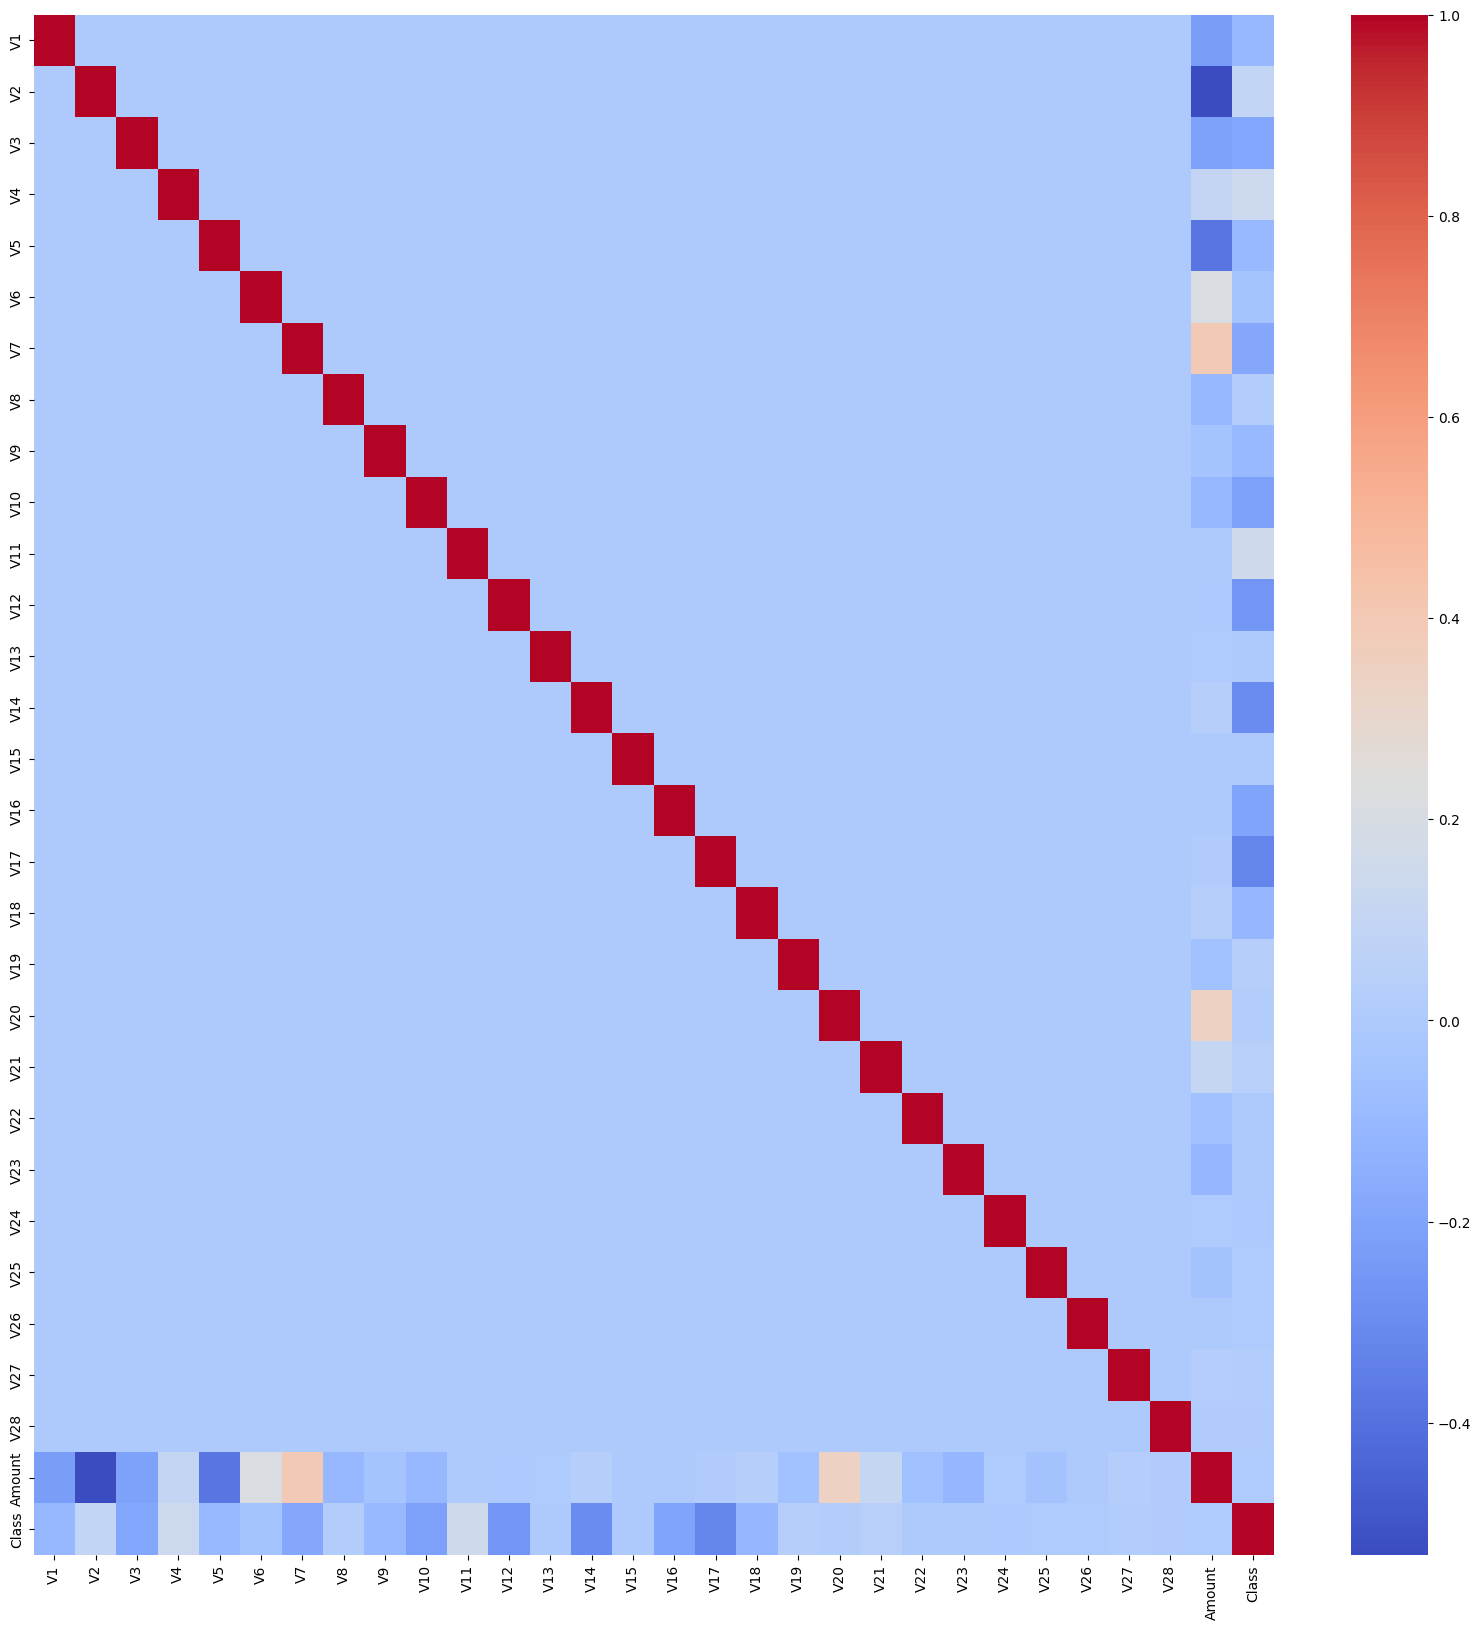

In [11]:
corr = df_scam.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_scam = RandomForestClassifier(n_estimators=1000, max_depth=5 , random_state=518)
rf_scam.fit(Xtrain, ytrain)
print(f"랜덤포레스트 훈련 세트 정확도: {rf_scam.score(Xtrain, ytrain):.3f}")

랜덤포레스트 훈련 세트 정확도: 0.937


In [13]:
from xgboost import XGBClassifier
xgb_scam = XGBClassifier(n_estimators=1000, learning_rate = 0.01 ,max_depth=5, random_state=518)
xgb_scam.fit(Xtrain, ytrain)
print(f"xgboost 훈련 세트 정확도: {xgb_scam.score(Xtrain, ytrain):.3f}")

xgboost 훈련 세트 정확도: 0.994


In [14]:
from lightgbm import LGBMClassifier
lgbm_scam = LGBMClassifier(n_estimators=1000, num_leaves=24, n_jobs=-1, boost_from_average=False)
lgbm_scam.fit(Xtrain, ytrain)
print(f"lightgbm 훈련 세트 정확도: {lgbm_scam.score(Xtrain, ytrain):.3f}")

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 28
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, roc_curve


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1:{f1:.4f}, AUC:{roc_auc:.4f}')

In [16]:
print('XGBoost 모델 성능')
get_clf_eval(ytest, rf_scam.predict(Xtest),rf_scam.predict_proba(Xtest)[:, 1])

XGBoost 모델 성능
오차 행렬
[[84929   366]
 [   16   132]]
정확도: 0.9955, 정밀도: 0.2651, 재현율: 0.8919, F1:0.4087, AUC:0.9930


In [17]:
print('Random Forest 모델 성능')
get_clf_eval(ytest, xgb_scam.predict(Xtest), xgb_scam.predict_proba(Xtest)[:, 1])

Random Forest 모델 성능
오차 행렬
[[84710   585]
 [   14   134]]
정확도: 0.9930, 정밀도: 0.1864, 재현율: 0.9054, F1:0.3091, AUC:0.9815


In [18]:
print('LightGBM 모델 성능')
get_clf_eval(ytest, lgbm_scam.predict(Xtest), lgbm_scam.predict_proba(Xtest)[:, 1])

LightGBM 모델 성능
오차 행렬
[[85266    29]
 [   26   122]]
정확도: 0.9994, 정밀도: 0.8079, 재현율: 0.8243, F1:0.8161, AUC:0.9461


In [19]:
from sklearn.preprocessing import Binarizer
# threshold 확인
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [20]:

get_eval_by_threshold(ytest, rf_scam.predict_proba(Xtest)[:, 1].reshape(-1, 1), [0.55, 0.6, 0.65, 0.7, 0.75])
print("========================이상 랜덤포레스트=============================")
get_eval_by_threshold(ytest, xgb_scam.predict_proba(Xtest)[:, 1].reshape(-1, 1), [0.55, 0.6, 0.65, 0.7, 0.75])
print("-============================이상 xgboost=============================")
get_eval_by_threshold(ytest, lgbm_scam.predict_proba(Xtest)[:, 1].reshape(-1, 1), [0.55, 0.6, 0.65, 0.7, 0.75])
print("============================이상 lightgbm=============================")

임곗값: 0.55
오차 행렬
[[85060   235]
 [   16   132]]
정확도: 0.9971, 정밀도: 0.3597, 재현율: 0.8919, F1:0.5126, AUC:0.9930
임곗값: 0.6
오차 행렬
[[85133   162]
 [   17   131]]
정확도: 0.9979, 정밀도: 0.4471, 재현율: 0.8851, F1:0.5941, AUC:0.9930
임곗값: 0.65
오차 행렬
[[85196    99]
 [   18   130]]
정확도: 0.9986, 정밀도: 0.5677, 재현율: 0.8784, F1:0.6897, AUC:0.9930
임곗값: 0.7
오차 행렬
[[85228    67]
 [   19   129]]
정확도: 0.9990, 정밀도: 0.6582, 재현율: 0.8716, F1:0.7500, AUC:0.9930
임곗값: 0.75
오차 행렬
[[85253    42]
 [   21   127]]
정확도: 0.9993, 정밀도: 0.7515, 재현율: 0.8581, F1:0.8013, AUC:0.9930
========================이상 랜덤포레스트=============================
임곗값: 0.55
오차 행렬
[[84831   464]
 [   15   133]]
정확도: 0.9944, 정밀도: 0.2228, 재현율: 0.8986, F1:0.3570, AUC:0.9815
임곗값: 0.6
오차 행렬
[[84914   381]
 [   17   131]]
정확도: 0.9953, 정밀도: 0.2559, 재현율: 0.8851, F1:0.3970, AUC:0.9815
임곗값: 0.65
오차 행렬
[[84979   316]
 [   19   129]]
정확도: 0.9961, 정밀도: 0.2899, 재현율: 0.8716, F1:0.4351, AUC:0.9815
임곗값: 0.7
오차 행렬
[[85055   240]
 [   21   127]]
정확도: 0.9969, 정밀도: 0.3460, 재현율:

### 탄젠트 곡선 사용하여 데이터 값 표준화


In [21]:
def normal_tanh(df):
    for col in df.columns:
        df[col] = np.tanh(df[col])
    return df

In [22]:
Xtrain_tanh = normal_tanh(Xtrain)

In [23]:
rf_scam_tanh = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=518)
rf_scam_tanh.fit(Xtrain_tanh, ytrain)
get_clf_eval(ytest, rf_scam_tanh.predict(Xtest), rf_scam_tanh.predict_proba(Xtest)[:, 1])

오차 행렬
[[83015  2280]
 [   13   135]]
정확도: 0.9732, 정밀도: 0.0559, 재현율: 0.9122, F1:0.1053, AUC:0.9853


In [24]:
xgb_scam_tanh = XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=3, random_state=518)
xgb_scam_tanh.fit(Xtrain_tanh, ytrain)
get_clf_eval(ytest, xgb_scam_tanh.predict(Xtest), xgb_scam_tanh.predict_proba(Xtest)[:, 1])

오차 행렬
[[83119  2176]
 [   14   134]]
정확도: 0.9744, 정밀도: 0.0580, 재현율: 0.9054, F1:0.1090, AUC:0.9852


In [25]:
# 피쳐 중요도 시각화
def plot_feature_importances(model, X):
    n_features = X.shape[1]
    plt.figure(figsize=(20, 20))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

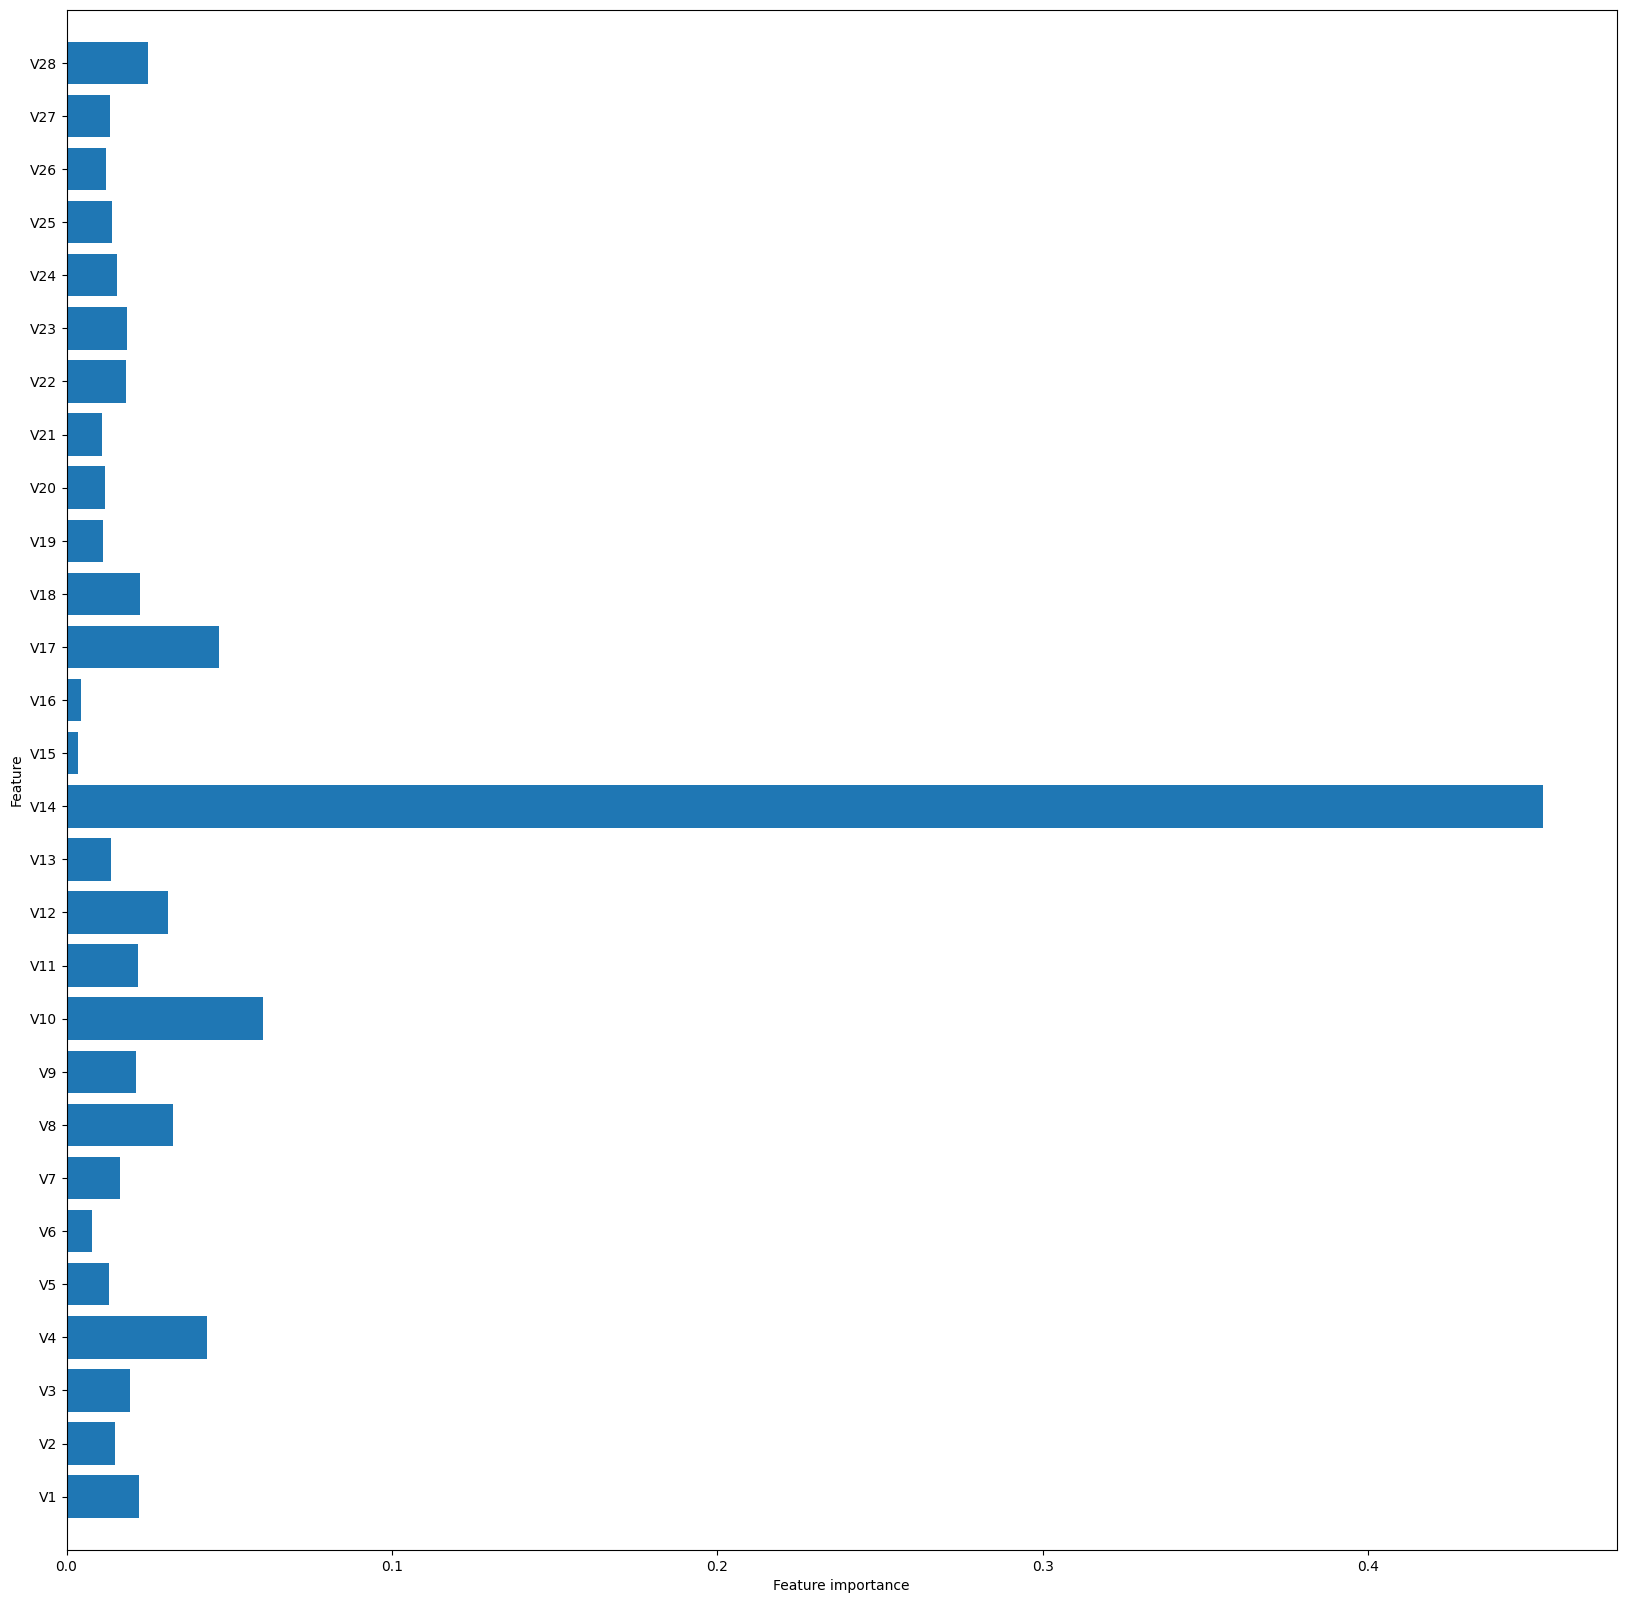

In [26]:
plot_feature_importances(xgb_scam_tanh, Xtrain) # xgb_scam_tanh 모델의 피쳐 중요도 시각화

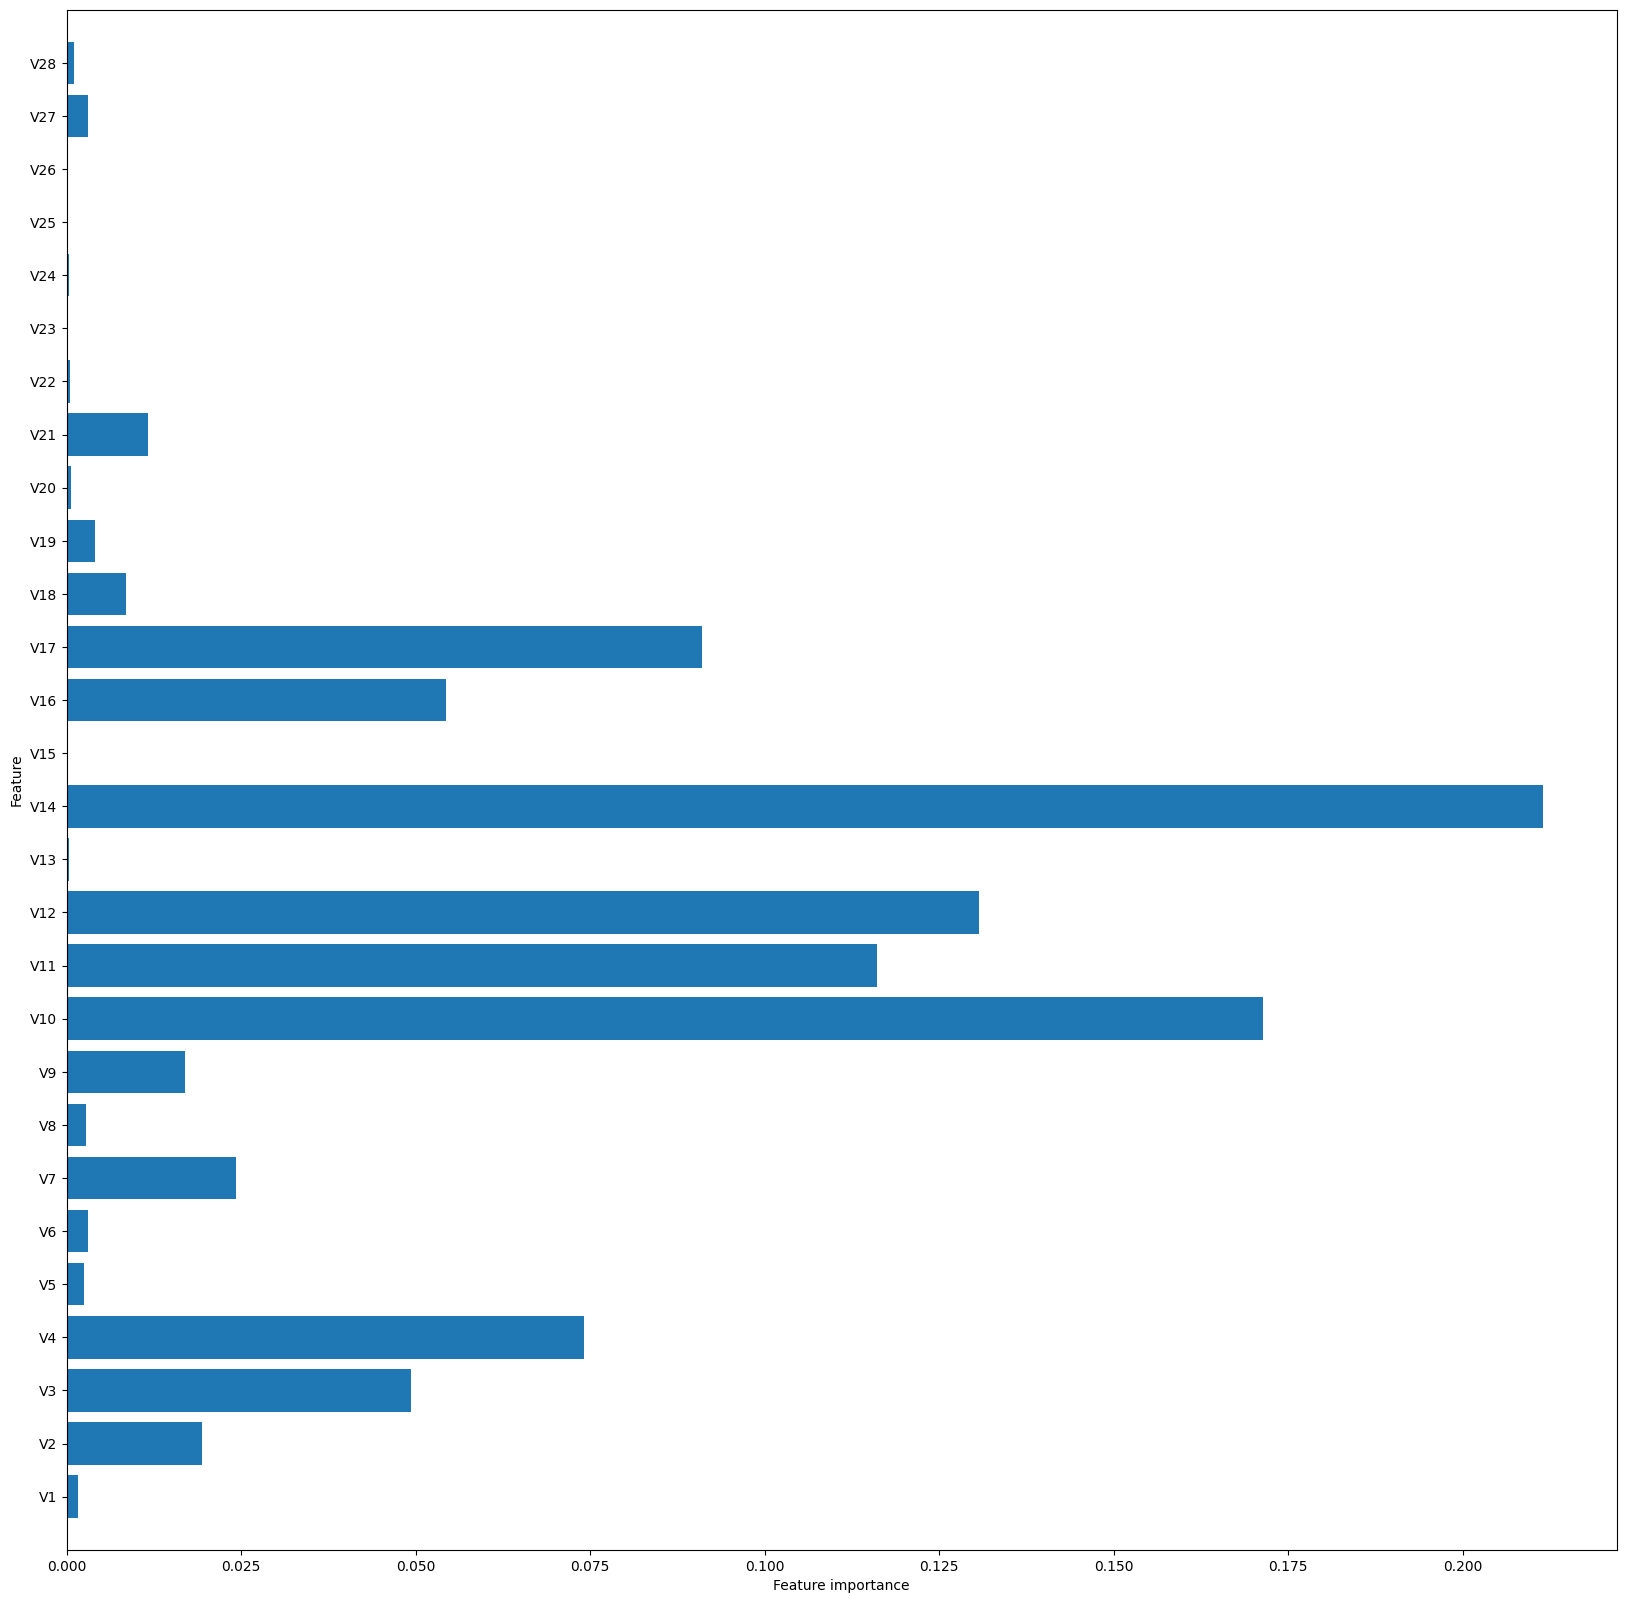

In [27]:
# rf_scam_tanh 모델의 피쳐 중요도 시각화
plot_feature_importances(rf_scam_tanh, Xtrain)

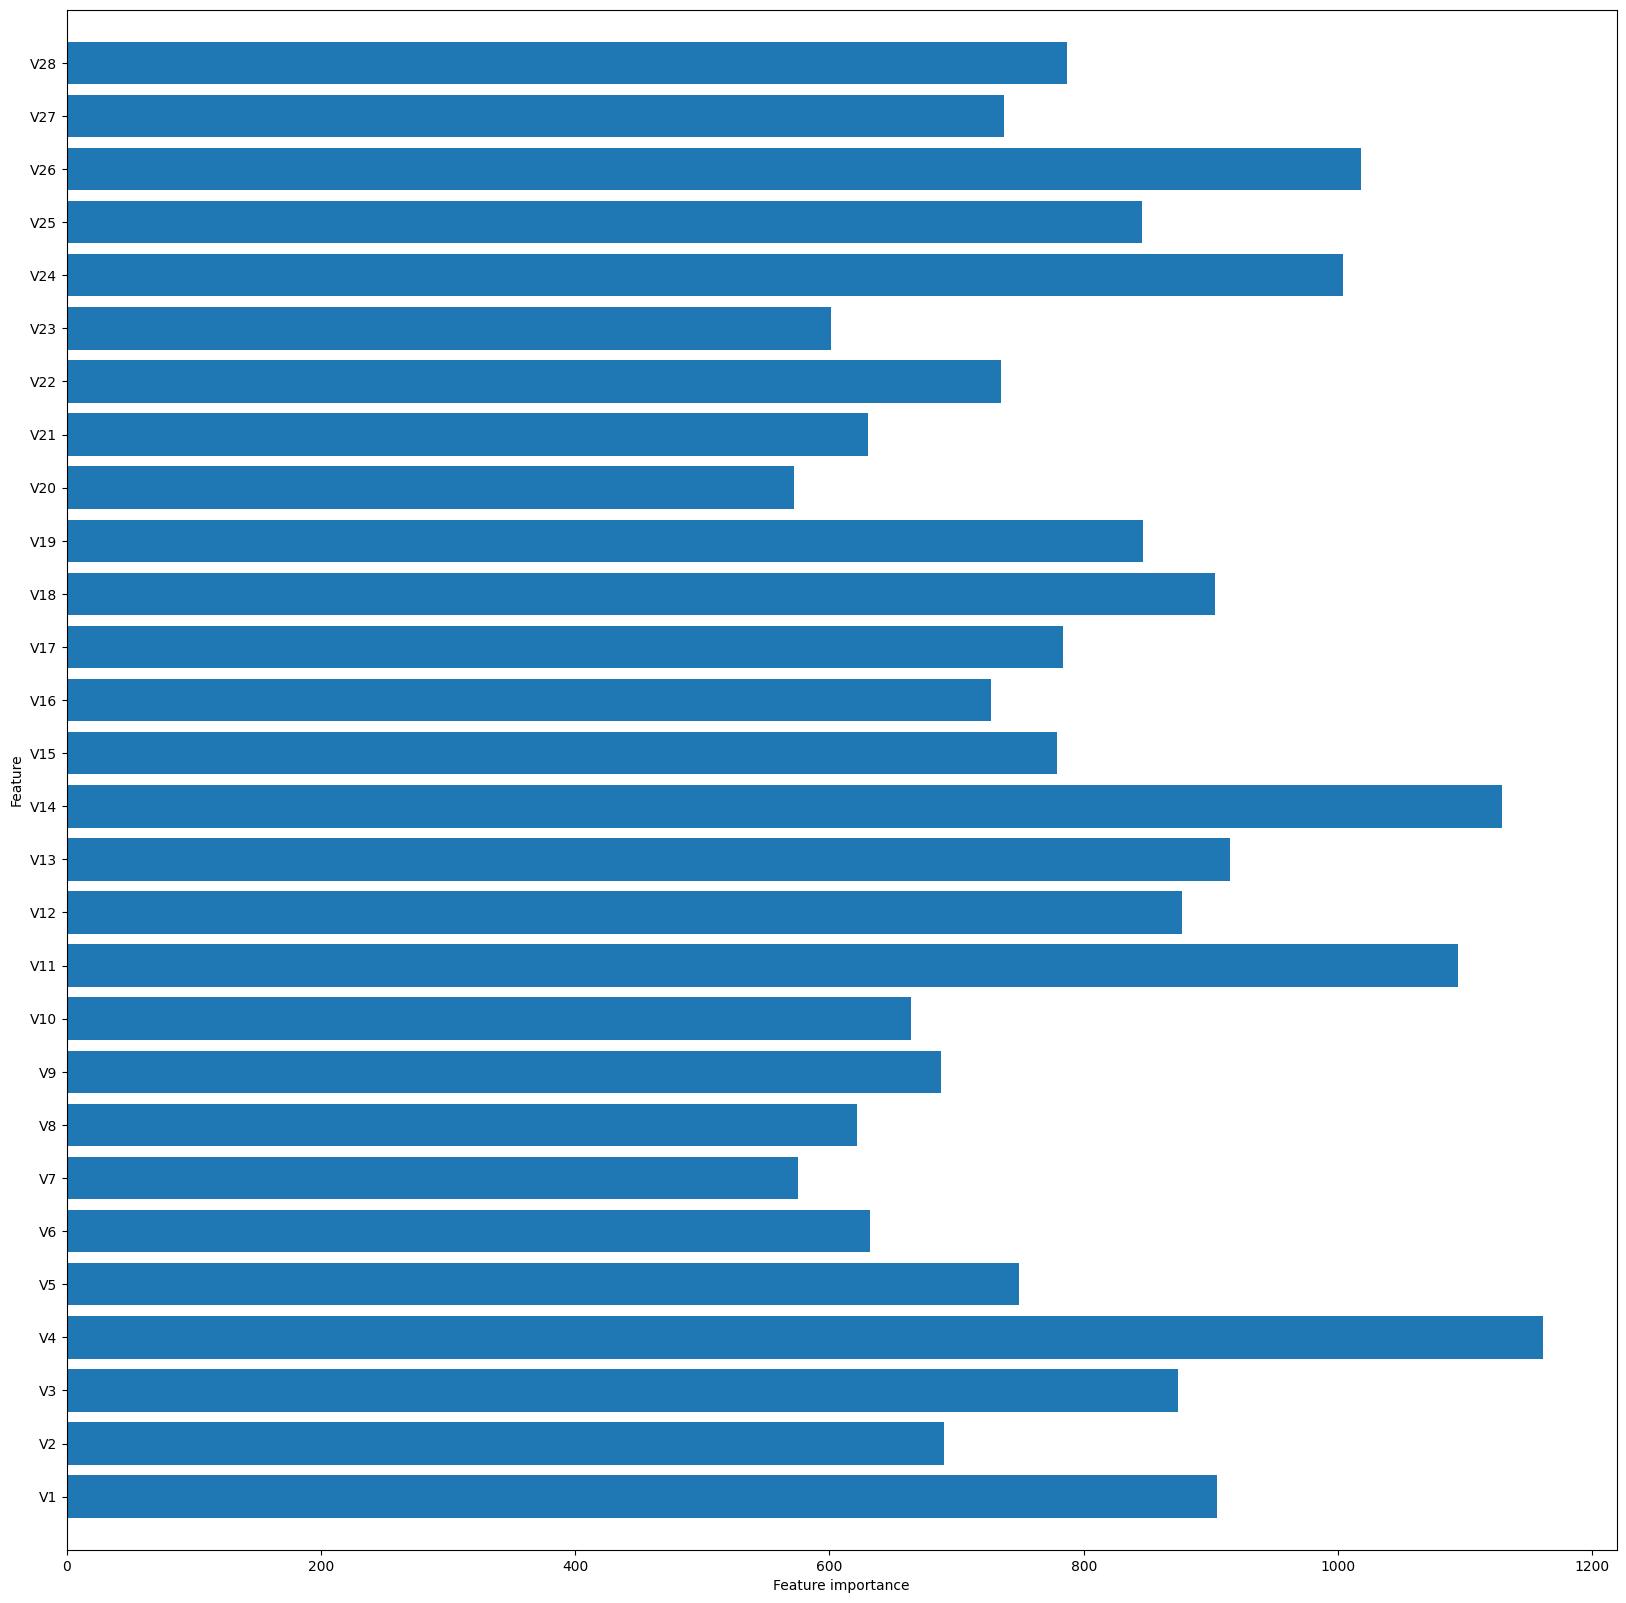

In [28]:
plot_feature_importances(lgbm_scam, Xtrain) # lgbm_scam 모델의 피쳐 중요도 시각화

In [29]:
X_train_feature = Xtrain[['V14', 'V4', 'V10', 'V12', 'V17', 'V11', 'V16', 'V3', 'V2', 'V7']]
X_test_feature = Xtest[['V14', 'V4', 'V10', 'V12', 'V17', 'V11', 'V16', 'V3', 'V2', 'V7']]


In [30]:
lightgbm_scam_feature = LGBMClassifier(n_estimators=100, num_leaves=64, n_jobs=-1, boost_from_average=False)
lightgbm_scam_feature.fit(X_train_feature, ytrain)
get_clf_eval(ytest, lightgbm_scam_feature.predict(X_test_feature), lightgbm_scam_feature.predict_proba(X_test_feature)[:, 1])

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 10
오차 행렬
[[82596  2699]
 [   21   127]]
정확도: 0.9682, 정밀도: 0.0449, 재현율: 0.8581, F1:0.0854, AUC:0.9327


In [34]:
xgb_importance = XGBClassifier(n_estimators=300, learning_rate=0.01, max_depth=4, random_state=518, device="cuda")
xgb_importance.fit(X_train_feature, ytrain)
get_clf_eval(ytest, xgb_importance.predict(X_test_feature), xgb_importance.predict_proba(X_test_feature)[:, 1])

오차 행렬
[[82099  3196]
 [   12   136]]
정확도: 0.9625, 정밀도: 0.0408, 재현율: 0.9189, F1:0.0782, AUC:0.9831
